# NLTK - natural language Processing Kit za Python
* Python alat za obradu teksta prirodnih jezika
* NLTK označavatelji (engl. taggers)

In [2]:
import nltk

In [3]:
# potrebni dodatni NLTK paketi, pokrenuti ćeliju ako bude trebalo
nltk.download('tagsets')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('brown')
nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


True

# Označivanje riječi (engl. tagging)
_part-of-speech tagging_ *(POS)* - označivanje riječi s njihovim vrstama  [U-Penn POS oznake](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
* liste riječi razložiti na dvojce `(riječ,vrsta_riječi)`
* vrste riječi imaju oznaku prema `PenTreebank` tablici
* NLTK nudi programe koji uče označavanja (engl. taggers) 
* NLTK korpusi sadrži označene korpuse




1.
Nadzirano učenje u obradi prirodnog jezika temelji se na učenju iz označenih podataka, pri čemu model dobiva ulazne primjere zajedno s točnim izlazima (npr. rečenice označene vrstom sentimenta ili riječima pridruženim gramatičkim oznakama). Cilj je naučiti preslikavanje između ulaza i izlaza kako bi se mogla predvidjeti oznaka za nove, neviđene podatke.
Nenadzirano učenje koristi neoznačene podatke, bez unaprijed zadanih točnih odgovora, te model samostalno otkriva obrasce i strukture u podacima, kao što su grupiranje sličnih dokumenata ili otkrivanje tema u tekstu.

In [4]:
# POS oznake
#nltk.help.upenn_tagset()
# ili specificne?
#nltk.help.upenn_tagset('CC')
nltk.help.upenn_tagset('NN*')


NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [5]:

# testiranje
from nltk.tokenize import word_tokenize
text = word_tokenize('And now for something completely different')
nltk.pos_tag(text)
#nltk.help.upenn_tagset('RB')

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]


2. Neka je:
	d dokument,
	c∈C={+,-}  klasa (pozitivan / negativan sentiment),
	dokument dpredstavljen nizom riječi w_1,w_2,…,w_(∣d∣)(bag-of-words).
Prema Bayesovu pravilu i naivnoj Bayesovoj pretpostavci vrijedi:
c ̂_NB=arg⁡(max⁡)┬(c∈C) P(c∣d)=arg⁡(max⁡)┬(c∈C) P(c)∏_(i=1)^(∣d∣)▒〖P(〗 w_i∣c)

Radi numeričke stabilnosti, u praksi se koristi logaritamski oblik:
c ̂_NB=arg⁡(max⁡)┬(c∈C) (log⁡P(c)+∑_(i=1)^(∣d∣)▒log⁡P(w_i∣c))



In [6]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## Korištenje označenih korpusa.

In [7]:
# Brownov korpus
nltk.corpus.brown.tagged_words()[:5]
# conll2000 korpus
nltk.corpus.conll2000.tagged_words()[:5]
# treebank korpus s universal POS
#nltk.corpus.treebank.tagged_words(tagset='universal')[:5]

[('Confidence', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('pound', 'NN'),
 ('is', 'VBZ')]

3. U binarnoj logističkoj regresiji vjerojatnost da uzorak x pripada klasi y=1 modelira se kao
P(y=1∣x)=σ(w^⊤ x+b)=1/(1+e^(-(w^⊤ x+b)) ),

gdje su wvektor težina, bslobodni član, a σ(⋅)sigmoid funkcija.
Uloga sigmoid funkcije je preslikati linearni izraz w^⊤ x+b u interval (0ⓜ,1), tako da se izlaz može tumačiti kao vjerojatnost pripadnosti klasi. Vjerojatnost druge klase dobiva se kao P(y=0∣x)=1-P(y=1∣x).



Najučestalije oznake za EN jezik?

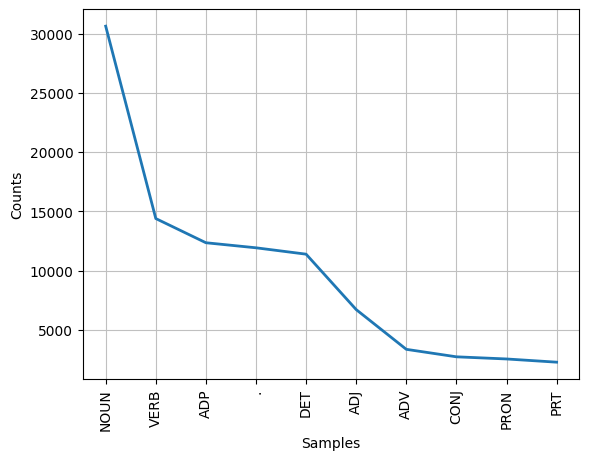

In [8]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

fd = nltk.FreqDist(tag_fd)
fd.plot(10);

Ali uz malo dodatne NLTK dokumentacije i (slabo) dostupnih HR resursa ...

In [9]:
from nltk.corpus.reader.conll import ConllCorpusReader
sethr = ConllCorpusReader(
    'data/',
    'web.hr.conll',
    ('ignore','words','ignore','ignore','pos','tree')    
)

In [14]:
sethr.words()
sethr.tagged_words()

[('Čula', 'Vmp-pn'), ('su', 'Var3p'), ('se', 'Px--sa'), ...]

In [11]:
from nltk.corpus.reader.mte import MTETagConverter

set_hr_upos = [(word,MTETagConverter.msd_to_universal(tag)) for (word,tag) in sethr.tagged_words()]
set_hr_upos[:4]

[('Čula', 'VERB'), ('su', 'VERB'), ('se', 'PRON'), ('objašnjenja', 'NOUN')]

## Koje vrste riječi su u HR učestale?

4. Osnovni cilj K-means algoritma je podijeliti skup podataka u Kklastera tako da su podaci unutar istog klastera što sličniji, a podaci u različitim klasterima što različitiji, odnosno da se minimizira suma kvadrata udaljenosti podataka od pripadnih centara klastera.
Iterativno ažuriranje odvija se u dva koraka:
	Dodjela klastera – svaki podatak pridružuje se najbližem centru klastera (najčešće prema euklidskoj udaljenosti).
	Ažuriranje centara – svaki centar klastera računa se kao aritmetička sredina svih podataka dodijeljenih tom klasteru.
Postupak se ponavlja dok se centri klastera više ne mijenjaju ili dok se ne postigne uvjet konvergencije.


<Axes: xlabel='Samples', ylabel='Counts'>

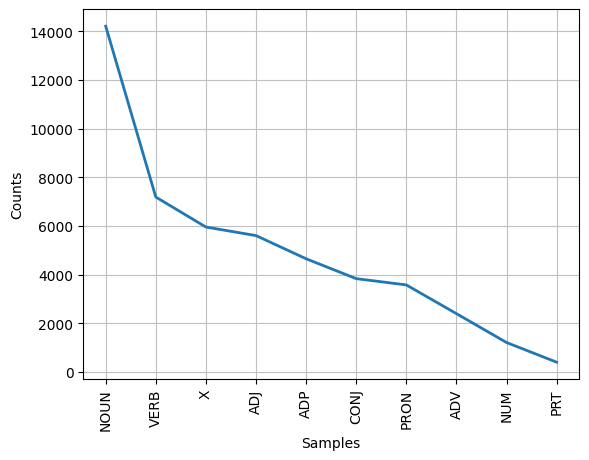

In [12]:
tag_fd = nltk.FreqDist(tag for (word, tag) in set_hr_upos)
tag_fd.plot(10)

Koje su najčešće riječi po razredima riječi?

5. U evaluaciji binarnog klasifikatora preciznost (precision) i odziv (recall) definiraju se pomoću elemenata matrice zabune:
	Preciznost je udio ispravno predviđenih pozitivnih primjera među svim primjerima koje je model označio kao pozitivne:
"Precision"=TP/(TP+FP).

	Odziv je udio ispravno predviđenih pozitivnih primjera među svim stvarno pozitivnim primjerima:
"Recall"=TP/(TP+FN).

F-mjera (najčešće F_1) koristi se jer predstavlja harmonijsku sredinu preciznosti i odziva:
F_1=(2⋅"T" P)/("2" ⋅TP+FP+FN),

te daje uravnoteženu mjeru uspješnosti klasifikatora, osobito kada postoji neravnoteža između klasa ili kada je važno istovremeno uzeti u obzir i preciznost i odziv.


In [13]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])


NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [14]:
tagdict = findtags('NOUN', set_hr_upos)
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NOUN [('godine', 93), ('vrijeme', 46), ('ljudi', 40), ('način', 39), ('godina', 39)]


## Izgradnja označavatelja

6. WordNet je leksičko-semantička baza podataka u kojoj su riječi grupirane u sinonimske skupove (synsete), pri čemu svaki skup predstavlja jedno značenje riječi. Između synseta su definirane različite leksičko-semantičke relacije, poput sinonimije, hiperonimije/hiponimije, antonimije i meronimije.
Sličnost između pojmova u WordNet-u iskazuje se na temelju njihove pozicije u hijerarhijskoj strukturi (taksonomiji), primjerice mjerenjem duljine puta između synseta, dubine njihova zajedničkog nadređenog pojma (najnižeg zajedničkog hiperonima) ili kombinacijom tih kriterija.


In [15]:
# skup za treniranje i testiranje

import nltk
import random

from nltk.corpus import brown
brown_sents = brown.sents(categories='news') # dohvati tekstove 'vijesti'
brown_tagged_sents = [sentence for sentence in nltk.corpus.brown.tagged_sents(categories='news',tagset='universal')]

# podjela 9 : 1
size = int(0.9 * len(brown_tagged_sents))

# permutiraj skup rečenica
random.shuffle(brown_tagged_sents)

train_sents = brown_tagged_sents[:size]
test_sents  = brown_tagged_sents[size:]



### Regex označavatelj

7. U modernom NLP-u preferira se korištenje vektora riječi (word embeddings) umjesto one-hot reprezentacija jer vektori riječi omogućuju kompaktnu i semantički bogatu reprezentaciju značenja riječi.
Za razliku od one-hot vektora, koji su vrlo visokodimenzionalni i rijetki te ne nose informaciju o sličnosti između riječi, vektori riječi su niskodimenzionalni, gusti i kodiraju semantičku i sintaktičku sličnost (npr. slične riječi imaju slične vektore). Time se omogućuje mjerenje sličnosti između riječi, bolja generalizacija modela te učinkovitije učenje i primjena u NLP zadacima.


In [16]:


# označivanje na temelju regexa
patterns = [
    (r'.*ing$', 'VERB'), # gerunds
    (r'.*ed$', 'VERB'), # simple past
    (r'.*es$', 'VERB'), # 3rd singular present
    (r'.*ould$', 'VERB'), # modals
    (r'.*\'s$', 'NOUN'), # possessive nouns
    (r'.*s$', 'NOUN'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
   (r'.*', 'NOUN') # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)

test_sent = brown_sents[5]

tagged_sent = regexp_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)



print(f'Preciznost: {regexp_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 



It NOUN
recommended VERB
that NOUN
Fulton NOUN
legislators NOUN
act NOUN
`` NOUN
to NOUN
have NOUN
these NOUN
laws NOUN
studied VERB
and NOUN
revised VERB
to NOUN
the NOUN
end NOUN
of NOUN
modernizing VERB
and NOUN
improving VERB
them NOUN
'' NOUN
. NOUN
Preciznost: 0.33058350100603623


## N-gram označavatelji

8. Temeljna ideja Word2Vec algoritma jest učiti vektorske reprezentacije riječi tako da riječi koje se pojavljuju u sličnim kontekstima imaju slične vektore, u skladu s distribucijskom hipotezom da se značenje riječi određuje njezinim kontekstom.
Word2Vec ima dvije glavne varijante:
•	CBOW koja predviđa središnju riječ na temelju okolnih (kontekstnih) riječi,
•	SKIP-GRAM koja predviđa kontekstne riječi na temelju središnje riječi.
Vektori riječi uče se iterativnim optimizacijskim postupkom u kojem se maksimizira vjerojatnost pojave stvarnih parova riječi i konteksta u korpusu. Tijekom učenja model prilagođava vektore riječi tako da povećava sličnost vektora riječi koje se često pojavljuju zajedno, a smanjuje sličnost nepovezanih riječi.


### Unigram označavanje

In [17]:

# unigram označavatelj
unigram_tagger = nltk.UnigramTagger(train_sents,backoff=regexp_tagger)

# oznaci skup za treniranje
tagged_sent = unigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {unigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act NOUN
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end NOUN
of ADP
modernizing VERB
and CONJ
improving VERB
them PRON
'' .
. .
Preciznost: 0.9338028169014084


Treniranje i testiranje modela.

9. TF-IDF je mjera koja procjenjuje važnost neke riječi u dokumentu u odnosu na cijeli skup dokumenata (korpus).
Sastoji se od dva dijela:
•	TF – mjeri koliko se često riječ pojavljuje u danom dokumentu,
•	IDF – umanjuje važnost riječi koje se pojavljuju u velikom broju dokumenata, a naglašava riječi koje su specifične za manji broj dokumenata.
TF-IDF se koristi za vektorsku reprezentaciju dokumenata, isticanje informativnih riječi te u zadacima poput pretraživanja dokumenata, klasifikacije i analize teksta.


In [18]:
# matrica zbunjenosti
test_tags = [tag for sent in brown.sents(categories='news')[:10] for (word, tag) in unigram_tagger.tag(sent)]

gold_tags = [tag for sent in brown.tagged_sents(categories='news',tagset='universal')[:10] for (word, tag) in sent]


cm = nltk.ConfusionMatrix(gold_tags, test_tags)
print(cm)


     |              C     N     P     V |
     |     A  A  A  O  D  O  N  R  P  E |
     |     D  D  D  N  E  U  U  O  R  R |
     |  .  J  P  V  J  T  N  M  N  T  B |
-----+----------------------------------+
   . |<38> .  .  .  .  .  .  .  .  .  . |
 ADJ |  .<18> .  .  .  .  1  .  .  .  . |
 ADP |  .  .<30> .  .  .  .  .  .  2  . |
 ADV |  .  1  . <5> .  .  .  .  .  .  . |
CONJ |  .  .  .  .<10> .  .  .  .  .  . |
 DET |  .  .  .  .  .<39> .  .  .  .  . |
NOUN |  .  .  .  .  .  .<81> .  .  .  . |
 NUM |  .  .  .  .  .  .  . <1> .  .  . |
PRON |  .  .  .  .  .  .  .  . <6> .  . |
 PRT |  .  .  .  .  .  .  .  .  . <3> . |
VERB |  .  .  .  .  .  .  1  .  .  .<48>|
-----+----------------------------------+
(row = reference; col = test)



### N-gram označavanje

10. Ako su riječi reprezentirane vektorima riječi, njihova se sličnost najčešće računa pomoću kosinusne sličnosti.
Za dva vektora riječi ui vkosinusna sličnost definirana je kao:
cos⁡(u,v)=(u⋅v)/(∥u∥" " ∥v∥)

gdje je u⋅v skalarni produkt, a ∥u∥i ∥v∥euklidske norme vektora.
Kosinusna sličnost mjeri kut između vektora, a ne njihovu duljinu, pa se riječi sličnog značenja nalaze blizu jedna drugoj u vektorskom prostoru i imaju visoku vrijednost kosinusne sličnosti.


NLTK nudi mogućnost izgrađivanja HMM modela označavatelja.

In [20]:
# trenrianje bigramskog HMM
bigram_tagger = nltk.BigramTagger(train_sents) 


# oznaci skup za treniranje
tagged_sent = bigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {bigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act NOUN
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end NOUN
of ADP
modernizing VERB
and CONJ
improving VERB
them PRON
'' .
. .
Preciznost: 0.17837022132796782


In [21]:
# trenrianje bigramskog HMM
trigram_tagger = nltk.TrigramTagger(train_sents) 


# oznaci skup za treniranje
tagged_sent = trigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {trigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act NOUN
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end None
of None
modernizing None
and None
improving None
them None
'' None
. None
Preciznost: 0.0886317907444668


**Problem inherentne rijetkosti**: Uočavamo značajan pad u preciznosti 2,3-gramskom modelu u uspredbi s unigram modelom zbog rijetkom 2,3-grama u skupu za treniranje. 

Kako ovo rješiti?
  * zaglađivanje
  * povećavanje korpusa za  treniranje
  * kombinirati unigram, bigram i trigram model

### Kombinacija označavatelja

N-grami višeg reda imaju bolje *pokrivanje* (recall/coverage) nego *preciznost* (accuracy). Neka je dan skup podataka $x_i$ i razred $y_i\in\{0,1\}$ kojem pripadaju $\{x_1,y_i\}, \{x_2,y_2\},\ldots,\{x_n,y_n\}$. Neka je $f$ klasifikator podataka $x_i$ i neka je $$TP=|\{x_i:y_i = f(x_i) = 1\}|, FP=|\{x_i:f(x_i) = 1, y_i=0\}|, FN=|\{x_i:f(x_i) = 0, y_i=1\}|$$.

$$precision = \frac{TP}{TP+FP}, recall = \frac{TP}{TP+FN}$$

In [22]:
t0 = regexp_tagger # osnovni regexp parser
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents,backoff=t2)


# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {t3.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 




It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act NOUN
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end None
of None
modernizing None
and None
improving None
them None
'' None
. None
Preciznost: 0.9379275653923541


In [23]:
# matrica zbunjenosti
test_tags = [tag for sent in brown.sents(categories='news')[:10] for (word, tag) in t3.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents(categories='news',tagset='universal')[:10] for (word, tag) in sent]

cm = nltk.ConfusionMatrix(gold_tags, test_tags)
print(cm)

     |              C     N     P     V |
     |     A  A  A  O  D  O  N  R  P  E |
     |     D  D  D  N  E  U  U  O  R  R |
     |  .  J  P  V  J  T  N  M  N  T  B |
-----+----------------------------------+
   . |<38> .  .  .  .  .  .  .  .  .  . |
 ADJ |  .<19> .  .  .  .  .  .  .  .  . |
 ADP |  .  .<30> .  .  .  .  .  .  2  . |
 ADV |  .  .  . <6> .  .  .  .  .  .  . |
CONJ |  .  .  .  .<10> .  .  .  .  .  . |
 DET |  .  .  .  .  .<39> .  .  .  .  . |
NOUN |  .  .  .  .  .  .<81> .  .  .  . |
 NUM |  .  .  .  .  .  .  . <1> .  .  . |
PRON |  .  .  .  .  .  .  .  . <6> .  . |
 PRT |  .  .  .  .  .  .  .  .  . <3> . |
VERB |  .  .  .  .  .  .  1  .  .  .<48>|
-----+----------------------------------+
(row = reference; col = test)

